# ufc-stats-visualization

This purpose of this notebook is to visualize and analyze the UFC data that is scraped via my web scraper before modeling the data using various Machine Learning classification algorithms.

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
import random


x_labels = ['rf','bf','winner','rwins','bwins','rloses','bloses','rslpm','bslpm','rstrac','bstrac','rsapm','bsapm','rstrd','bstrd','rtdav',
           'btdav', 'rtdac','btdac','rtdd','btdd','rsubav','bsubav']

stat_indexes = [4,5,13,14,15,16,17,18,19,20]

In [2]:
def construct_X(df,shouldRandomize):
    """ 
    Constructs the X dataframe from using the fights df and fighter stats dict
    Arguments:
        df: the fighter df that is read from fighters.csv
        shouldRandomize: boolean flag to randomize the red/blue corner to balance the classes
    Returns:
        The X dataframe which includes the fighters,their stats, and the winner
    """
    X = pd.DataFrame(columns=x_labels)
    for row in df.itertuples():
        temp_ar = []
        rwin = row[3]
        chance = random.uniform(0,1)
        if chance > 0.65 and shouldRandomize:
            rf = row[2]
            bf = row[1]
            rwin = row[4]
            bwin = row[3]
        else:
            rf = row[1]
            bf = row[2]
            rwin = row[3]
            bwin = row[4]
            
        if rwin != bwin:
            temp_ar.append(rf)
            temp_ar.append(bf)

            winner = 1 if rwin == 1 else 0
            temp_ar.append(winner)

            rf_stats = fighter_stats[rf]
            bf_stats = fighter_stats[bf]

            for index in stat_indexes:
                rstat = rf_stats[index]
                bstat = bf_stats[index]
                temp_ar.append(rstat)
                temp_ar.append(bstat)

            X = pd.concat([pd.DataFrame([temp_ar], columns=x_labels), X], ignore_index=True)
    
    return X

    

In [3]:
fighter_stats = {}

with open('fighters.csv', mode='r') as inp:
    reader =csv.reader(inp)
    fighter_stats = {rows[0]:rows[0:] for rows in reader}

##read from the scraper generated csv files
fighter_df = pd.read_csv('fighters.csv')
fights_df = pd.read_csv('fights.csv')

#construct a non-randomized dataframe
X = construct_X(fights_df,False)

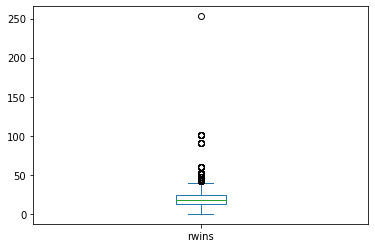

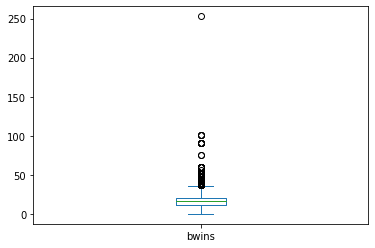

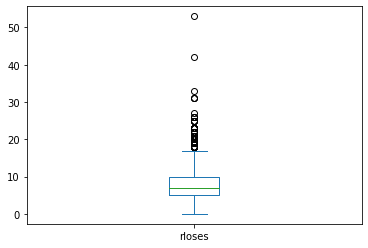

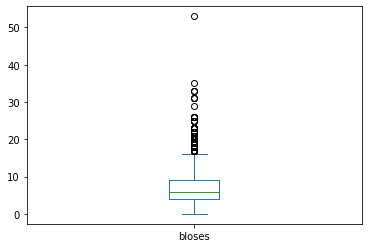

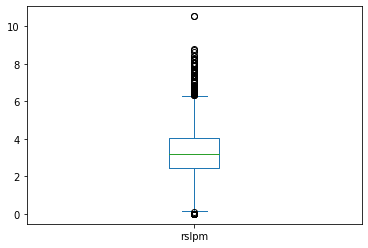

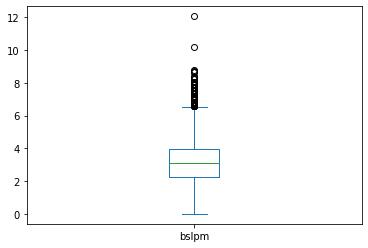

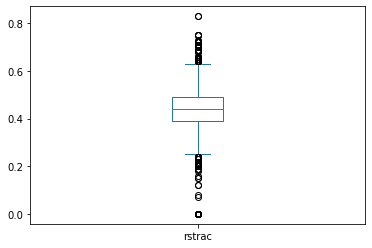

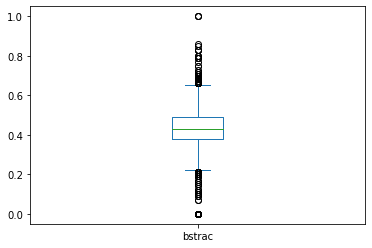

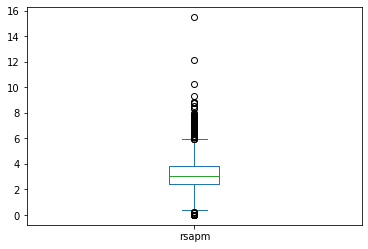

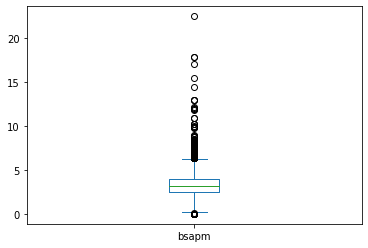

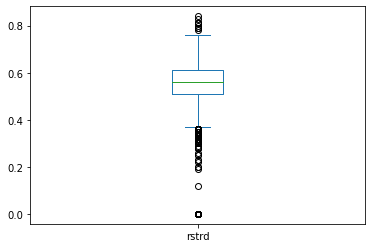

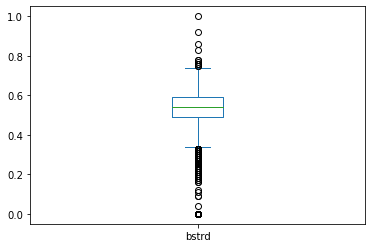

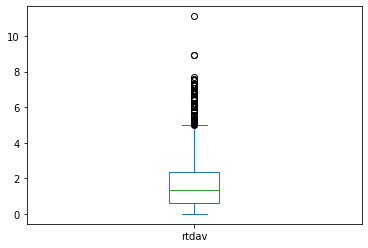

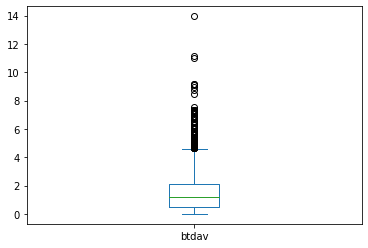

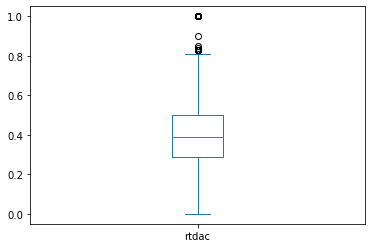

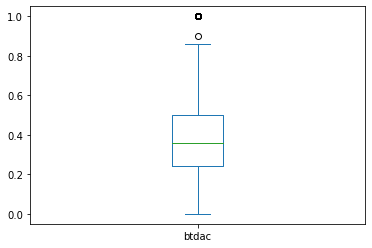

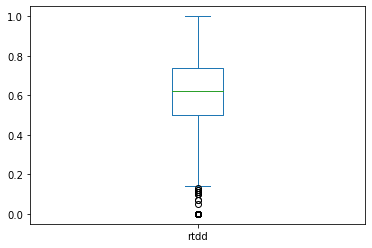

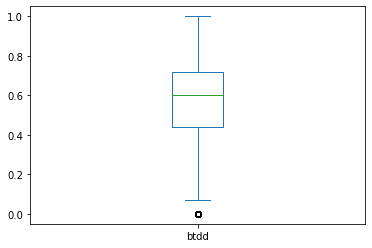

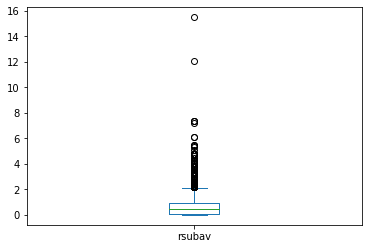

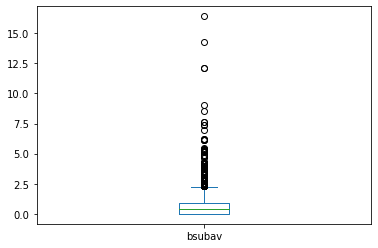

In [4]:
##generate a box plot for all individual 
for index in x_labels[3:]:
    X[index].astype(float).plot.box()
    plt.show()
    

In [82]:
X.count()

rf        6456
bf        6456
winner    6456
rwins     6456
bwins     6456
rloses    6456
bloses    6456
rslpm     6456
bslpm     6456
rstrac    6456
bstrac    6456
rsapm     6456
bsapm     6456
rstrd     6456
bstrd     6456
rtdav     6456
btdav     6456
rtdac     6456
btdac     6456
rtdd      6456
btdd      6456
rsubav    6456
bsubav    6456
dtype: int64

<AxesSubplot:xlabel='winner'>

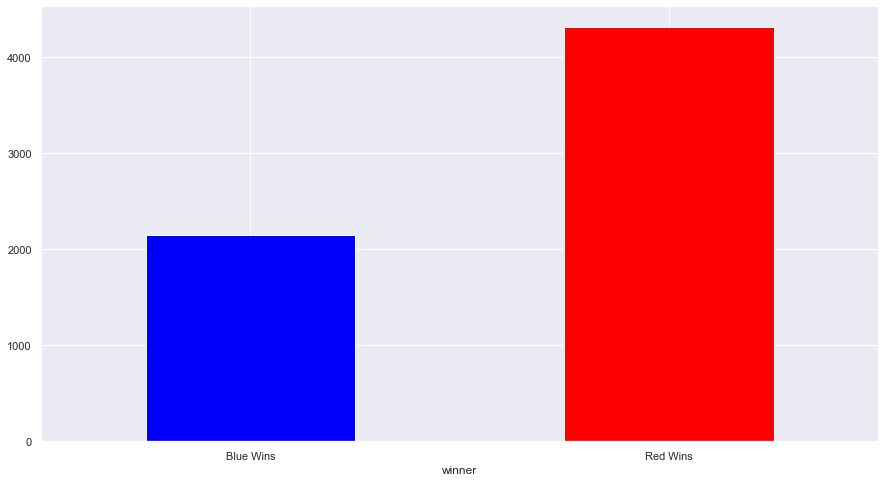

In [77]:
X.groupby('winner').size().rename({0:"Blue Wins",1:"Red Wins"}).plot.bar(rot=0,color=["blue","red"])

The red corner has won 2x more fights than the blue corner since the start of the UFC. This is something to keep an eye on while creating the model to predict fights. This means that our blue wins is under-represented by the dataset. I don't want my model to have a bias towards the red corner. After doing some research, it looks like this is a common issue Machine Learning engineers run into. There are two common solutions that we could implement: oversampling and undersampling. Oversampling is to randomly duplicate a sample from the under-represented class. For our data, we would randomly duplicate a blue win sample to increase the total count for blue wins. Undersampling is randomly removes samples from the majority class. For our data, we would randomly remove a sample from the red wins class.

Since we have such a small dataset already, undersampling isn't an option. We could oversample, but I decided to try my plan for the project. The champion is always in the red corner and challenger is always in the blue corner for championship fights. Otherwise, the red and blue corner don't signify anything. The favorite fighter could be in the blue or red corner. Therefore, my plan is to randomly swap the read and blue fighter until the dataset is more balanced.

In [58]:
X.loc[:,"rwins":].astype(float).describe()

,rwins,bwins,rloses,bloses,rslpm,bslpm,rstrac,bstrac,rsapm,bsapm,rstrd,bstrd,rtdav,btdav,rtdac,btdac,rtdd,btdd,rsubav,bsubav
count,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000
mean,19.157373,17.103934,7.815675,7.294300,3.299607,3.135184,0.435451,0.422062,3.162049,3.335620,0.547344,0.524133,1.609360,1.458243,0.390361,0.360545,0.598367,0.557677,0.661462,0.629879
std,9.757939,9.521025,4.620378,4.513288,1.308372,1.427229,0.095444,0.114234,1.197013,1.499831,0.102611,0.122839,1.279041,1.310688,0.192351,0.221601,0.209481,0.247200,0.748364,0.843557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,11.000000,5.000000,4.000000,2.470000,2.230000,0.390000,0.380000,2.420000,2.500000,0.510000,0.490000,0.607500,0.480000,0.290000,0.240000,0.500000,0.440000,0.100000,0.000000
50%,18.000000,16.000000,7.000000,6.000000,3.210000,3.115000,0.440000,0.430000,3.030000,3.130000,0.560000,0.540000,1.360000,1.170000,0.390000,0.360000,0.620000,0.600000,0.500000,0.400000
75%,24.000000,21.000000,10.000000,9.000000,4.020000,3.960000,0.490000,0.490000,3.830000,4.030000,0.610000,0.590000,2.360000,2.120000,0.500000,0.500000,0.740000,0.720000,0.900000,0.900000
max,253.000000,253.000000,53.000000,53.000000,10.530000,12.070000,0.830000,1.000000,15.480000,22.500000,0.840000,1.000000,11.110000,13.950000,1.000000,1.000000,1.000000,1.000000,15.500000,16.400000


array([<AxesSubplot:title={'center':'rwins'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'bwins'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'rloses'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'bloses'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'rslpm'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'bslpm'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'rstrac'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'bstrac'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'rsapm'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'bsapm'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'rstrd'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'bstrd'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'rtdav'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'btdav'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'rtdac'}, xlabel='winner'>,
       <AxesSubplot:title={'center':

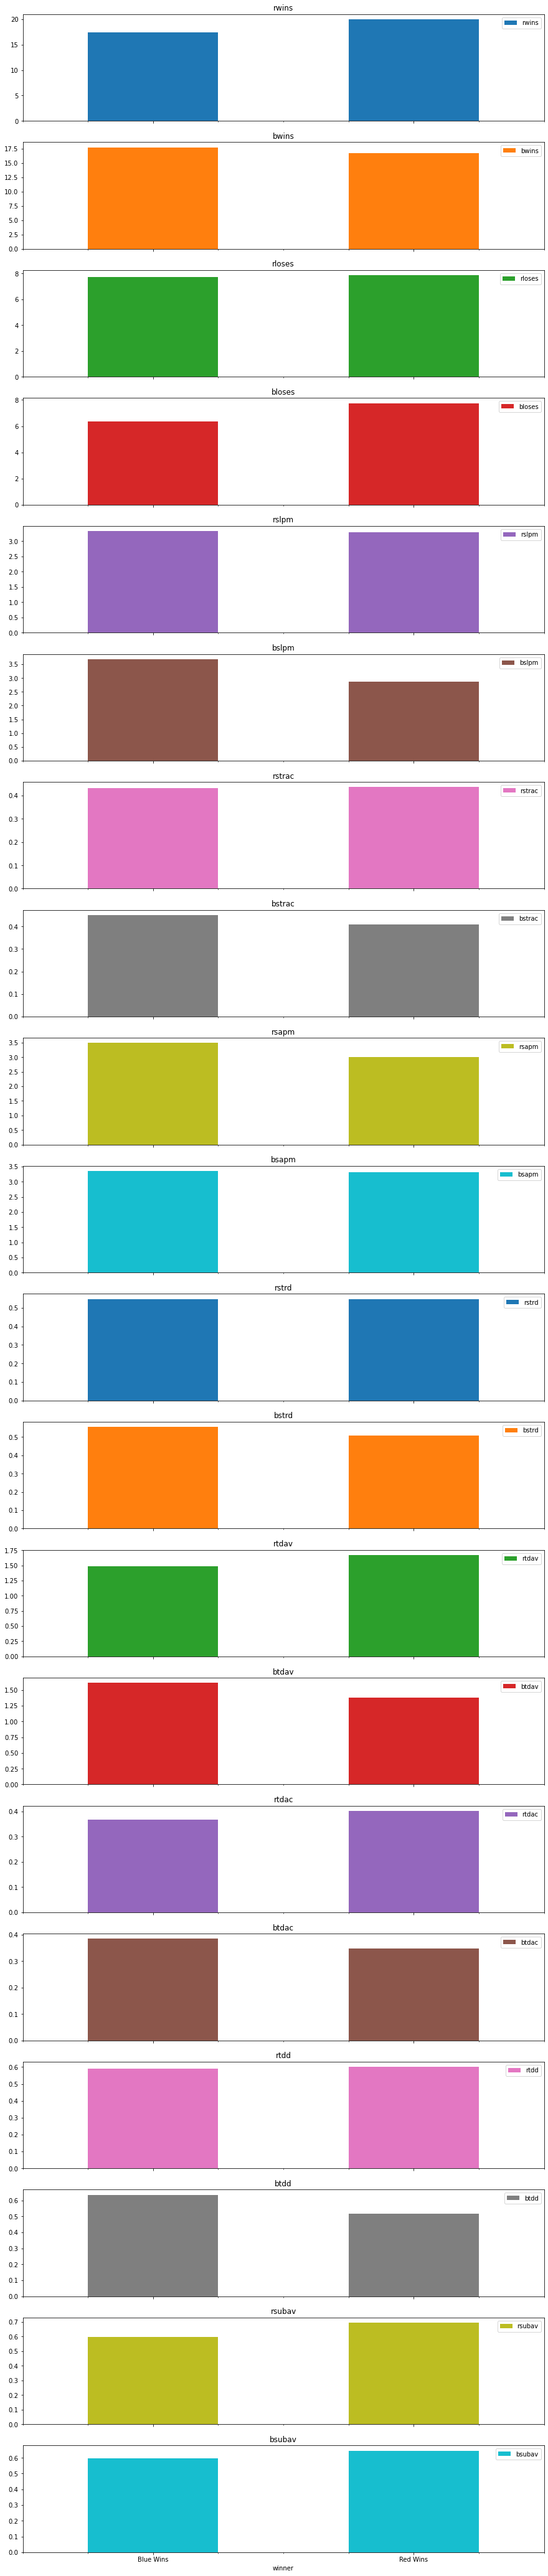

In [59]:
X.loc[:,"winner":].astype(float).groupby('winner').mean().rename({0:"Blue Wins",1:"Red Wins"}).plot(kind='bar', subplots=True,figsize=(15,75),rot=0)

In [83]:
pd.options.display.max_columns = 999
##describe the winner groups for the unbalanced dataset
X.loc[:,"winner":].astype(float).groupby('winner').describe(include="all")

rwins                                                        bwins  \
         count       mean        std  min   25%   50%    75%    max   count   
winner                                                                        
0.0     2144.0  17.460354   8.362657  0.0  11.0  16.0  22.00   60.0  2144.0   
1.0     4312.0  20.016929  10.274043  1.0  14.0  19.0  24.25  253.0  4312.0   

                                                            rloses            \
             mean        std  min   25%   50%   75%    max   count      mean   
winner                                                                         
0.0     17.780317   7.521056  1.0  13.0  17.0  22.0   60.0  2144.0  7.723881   
1.0     16.784091  10.356261  0.0  10.0  15.0  21.0  253.0  4312.0  7.872681   

                                             bloses                           \
             std  min  25%  50%   75%   max   count      mean       std  min   
winner                                                                         
0.0     4.236617  0.0  5.0  7.0  10.0  23.0  2144.0  6.380597  3.978444  0.0   
1.0     4.806753  0.0  4.0  7.0  11.0  53.0  4312.0  7.757885  4.695636  0.0   

                               rslpm                                          \
        25%  50%   75%   max   count      mean       std  min     25%    50%   
winner                                                                         
0.0     3.0  6.0   8.0  22.0  2144.0  3.327817  1.194657  0.0  2.5200  3.240   
1.0     4.0  7.0  10.0  53.0  4312.0  3.285990  1.359985  0.0  2.4475  3.205   

                        bslpm                                             \
           75%    max   count      mean       std  min   25%   50%   75%   
winner                                                                     
0.0     3.9625  10.53  2144.0  3.689492  1.283298  0.0  2.87  3.57  4.36   
1.0     4.0425  10.53  4312.0  2.860837  1.413507  0.0  1.95  2.84  3.72   

               rstrac                                                   \
          max   count      mean       std  min   25%   50%   75%   max   
winner                                                                   
0.0     12.07  2144.0  0.433265  0.078988  0.0  0.39  0.43  0.48  0.75   
1.0      8.76  4312.0  0.436651  0.102723  0.0  0.40  0.44  0.50  0.83   

        bstrac                                                    rsapm  \
         count      mean       std  min   25%   50%   75%   max   count   
winner                                                                    
0.0     2144.0  0.450448  0.072993  0.0  0.41  0.45  0.49  0.79  2144.0   
1.0     4312.0  0.408189  0.127747  0.0  0.36  0.42  0.48  1.00  4312.0   

                                                                bsapm  \
            mean       std  min     25%    50%     75%    max   count   
winner                                                                  
0.0     3.488815  1.190814  0.4  2.6975  3.315  4.0725  15.48  2144.0   
1.0     2.999608  1.164303  0.0  2.3000  2.920  3.6900  10.27  4312.0   

                                                            rstrd            \
            mean       std   min   25%   50%   75%    max   count      mean   
winner                                                                        
0.0     3.358340  1.162209  0.13  2.58  3.21  3.97   9.84  2144.0  0.546847   
1.0     3.323446  1.635324  0.00  2.44  3.10  4.06  22.50  4312.0  0.547310   

                                                 bstrd                      \
             std   min   25%   50%   75%   max   count      mean       std   
winner                                                                       
0.0     0.074164  0.19  0.51  0.55  0.60  0.81  2144.0  0.554748  0.070007   
1.0     0.114329  0.00  0.52  0.57  0.61  0.84  4312.0  0.508592  0.139519   

                                      rtdav                                 \
        min   25%   50%   75%   max   count      me

<AxesSubplot:>

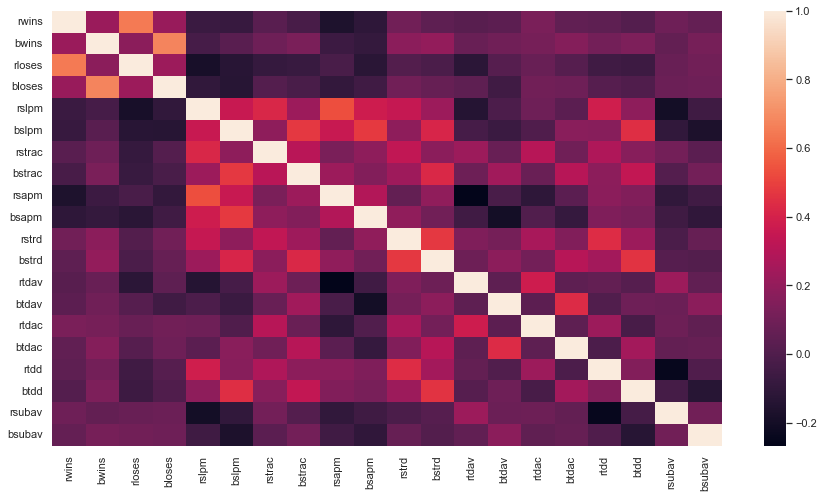

In [85]:
##genereate a heatmap for the unbalanced dataset
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(X.loc[:,"rwins":].astype(float).corr(method='pearson'))

In [86]:
##construct a correlation matrix for the unbalanced dataset
X.loc[:,"winner":].astype(float).corr()

,winner,rwins,bwins,rloses,bloses,rslpm,bslpm,rstrac,bstrac,rsapm,bsapm,rstrd,bstrd,rtdav,btdav,rtdac,btdac,rtdd,btdd,rsubav,bsubav
winner,1.000000,0.123437,-0.049289,0.015152,0.143622,-0.015068,-0.273703,0.016700,-0.174143,-0.192738,-0.010994,0.002122,-0.176914,0.069894,-0.082728,0.082917,-0.078780,0.021047,-0.223071,0.061126,0.027107
rwins,0.123437,1.000000,0.221980,0.646584,0.215106,-0.069472,-0.081779,0.026527,-0.028554,-0.165671,-0.108899,0.103100,0.039851,0.023532,0.039183,0.128593,0.050355,0.039708,0.014185,0.089931,0.061727
bwins,-0.049289,0.221980,1.000000,0.178233,0.675792,-0.033146,0.026339,0.091763,0.127557,-0.064736,-0.091844,0.177931,0.202182,0.073986,0.095310,0.114767,0.157406,0.108629,0.137884,0.058040,0.117798
rloses,0.015152,0.646584,0.178233,1.000000,0.224652,-0.184567,-0.131199,-0.087167,-0.077078,-0.021677,-0.124811,0.007777,-0.015824,-0.120210,0.016265,0.070513,0.019649,-0.051419,-0.063191,0.072744,0.099138
bloses,0.143622,0.215106,0.675792,0.224652,1.000000,-0.099599,-0.134080,0.011262,-0.020346,-0.097586,-0.053655,0.099195,0.065056,0.040603,-0.050596,0.100969,0.092941,0.015763,-0.004741,0.083590,0.090557
rslpm,-0.015068,-0.069472,-0.033146,-0.184567,-0.099599,1.000000,0.354605,0.418791,0.224300,0.531351,0.372046,0.348428,0.225859,-0.140084,-0.012448,0.093007,0.033899,0.386160,0.187234,-0.198026,-0.059125
bslpm,-0.273703,-0.081779,0.026339,-0.131199,-0.134080,0.354605,1.000000,0.185291,0.472961,0.351805,0.478084,0.186048,0.412144,-0.030403,-0.070817,-0.000081,0.169292,0.167258,0.444880,-0.102497,-0.169000
rstrac,0.016700,0.026527,0.091763,-0.087167,0.011262,0.418791,0.185291,1.000000,0.310429,0.124434,0.187814,0.333976,0.178025,0.224179,0.069572,0.304255,0.094438,0.278680,0.166390,0.108207,0.030544
bstrac,-0.174143,-0.028554,0.127557,-0.077078,-0.020346,0.224300,0.472961,0.310429,1.000000,0.225797,0.150825,0.232492,0.421949,0.088648,0.239984,0.076018,0.306042,0.179480,0.338247,0.011565,0.107682
rsapm,-0.192738,-0.165671,-0.064736,-0.021677,-0.097586,0.531351,0.351805,0.124434,0.225797,1.000000,0.290201,0.054626,0.193090,-0.267266,-0.022760,-0.113028,0.032951,0.174112,0.146293,-0.099436,-0.052415


All the visualizations and anlysis above has been done on the dataset that isn't randomized. I would like to randomize the dataset and produce visualizations so they can be compared. My goal is to produce models between the two datasets to see which one produces the more accurate model. The more accurate model will be integrated into a python web-application that will predict the ufc_fights weekly.

In [89]:
randX = construct_X(fights_df,True)

winner
0    2966
1    3490
dtype: int64


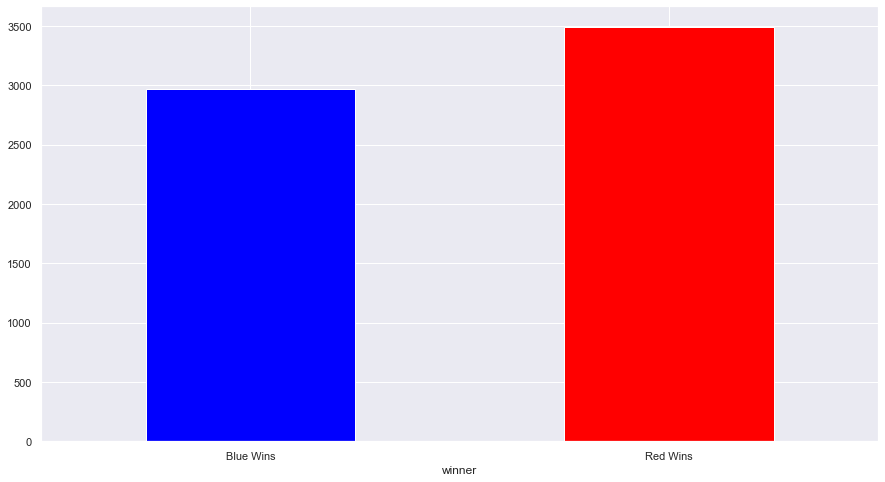

In [90]:
randX.describe()
randX.groupby('winner').size().rename({0:"Blue Wins",1:"Red Wins"}).plot.bar(rot=0,color=["blue","red"])
print(randX.groupby('winner').size())

In [39]:
randX.head()

,rf,bf,winner,rwins,bwins,rloses,bloses,rslpm,bslpm,rstrac,...,rstrd,bstrd,rtdav,btdav,rtdac,btdac,rtdd,btdd,rsubav,bsubav
0,Max Holloway,Yair Rodriguez,1,23,14,6,3,7.38,4.65,0.47,...,0.6,0.53,0.31,0.86,0.66,0.28,0.84,0.6,0.3,0.8
1,Mackenzie Dern,Tecia Torres,1,12,13,2,6,3.16,4.74,0.35,...,0.54,0.61,0.46,0.66,0.09,0.14,0.4,0.61,2.0,0.1
2,Felicia Spencer,Leah Letson,1,9,5,3,3,3.21,3.06,0.48,...,0.45,0.52,1.18,0.51,0.18,0.5,0.27,0.76,0.2,0.0
3,Chan Sung Jung,Alexander Volkanovski,0,17,24,7,1,3.97,6.63,0.42,...,0.52,0.6,0.74,1.95,0.47,0.36,0.72,0.7,0.7,0.2
4,Ben Rothwell,Marcos Rogerio de Lima,0,39,19,14,8,3.71,3.39,0.42,...,0.47,0.54,0.68,1.14,0.34,0.66,0.7,0.47,0.4,0.6


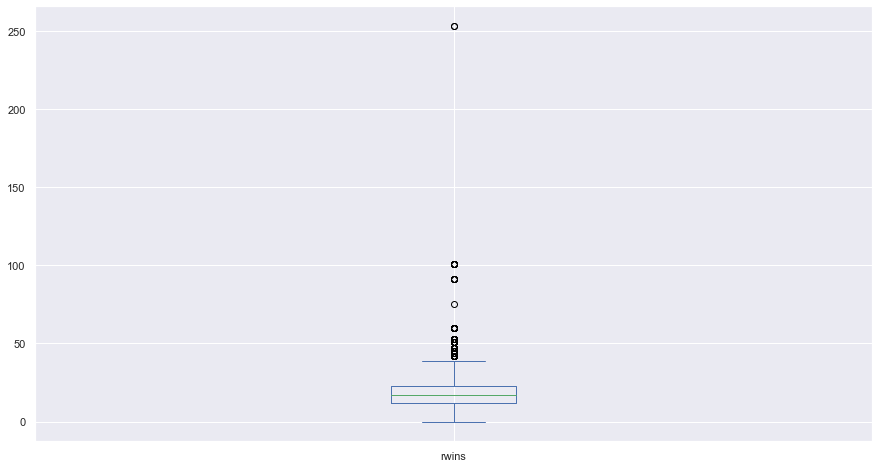

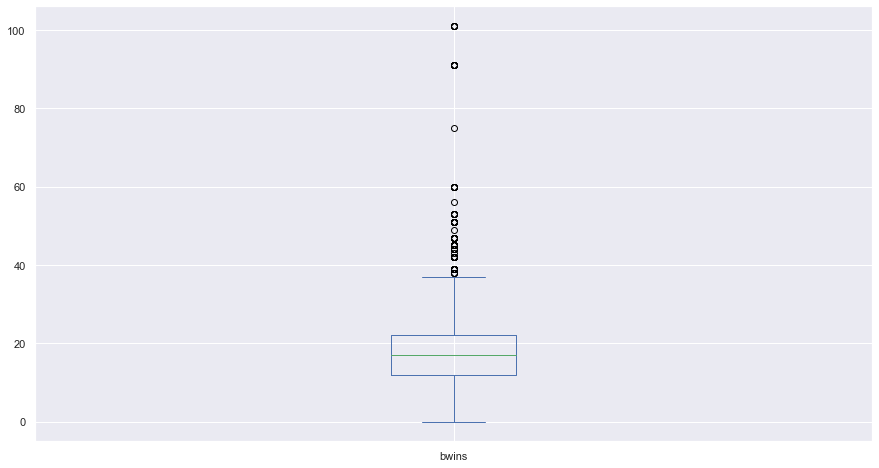

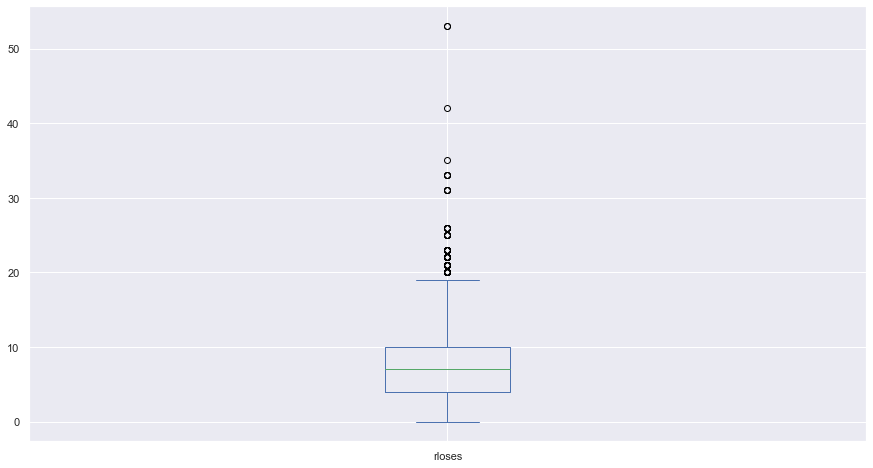

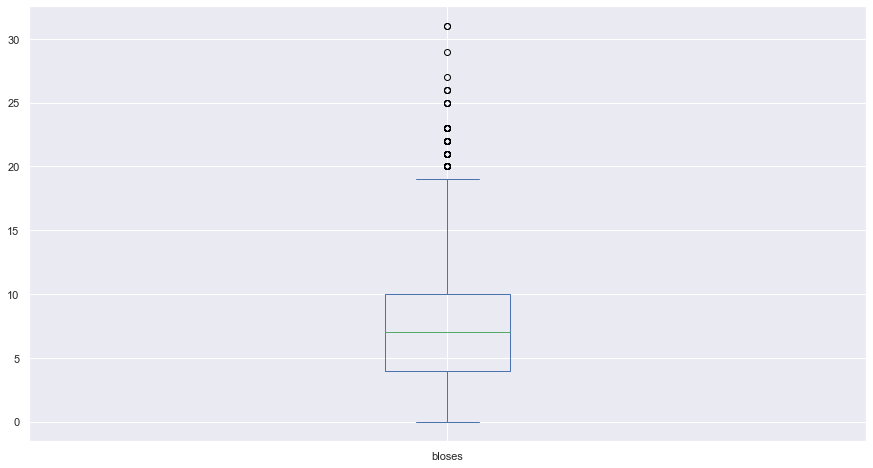

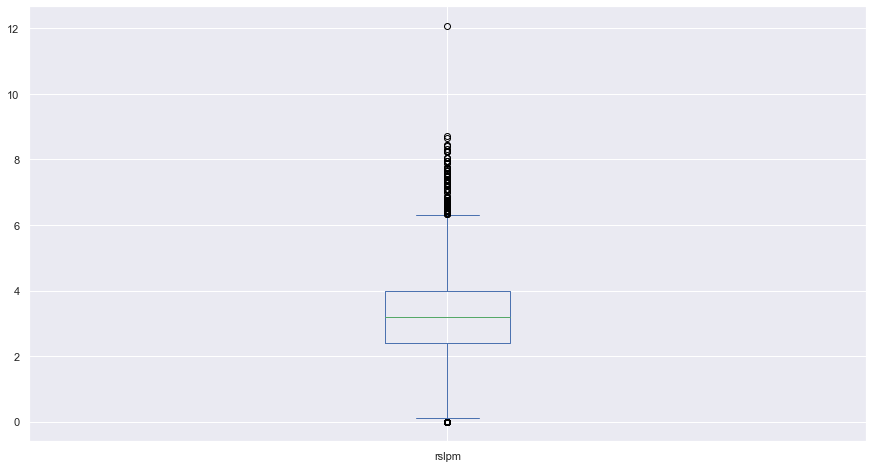

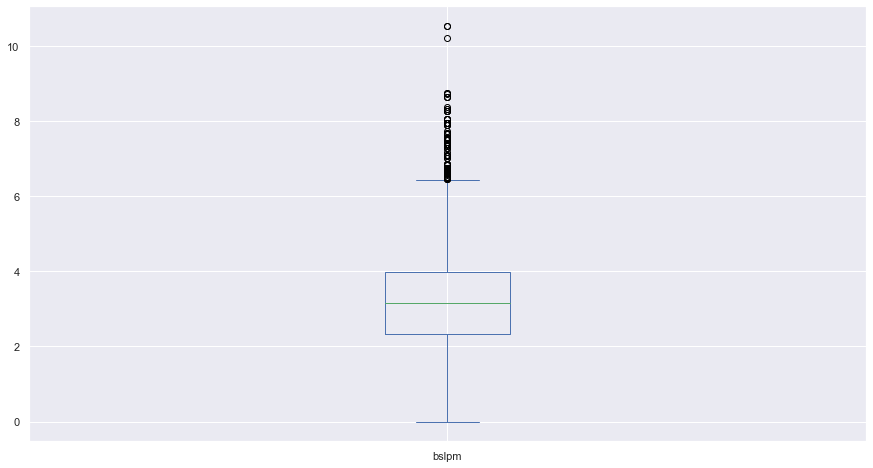

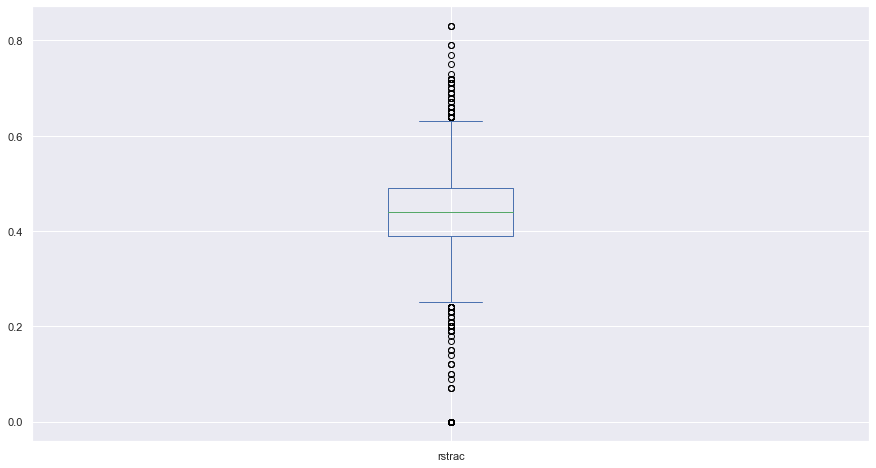

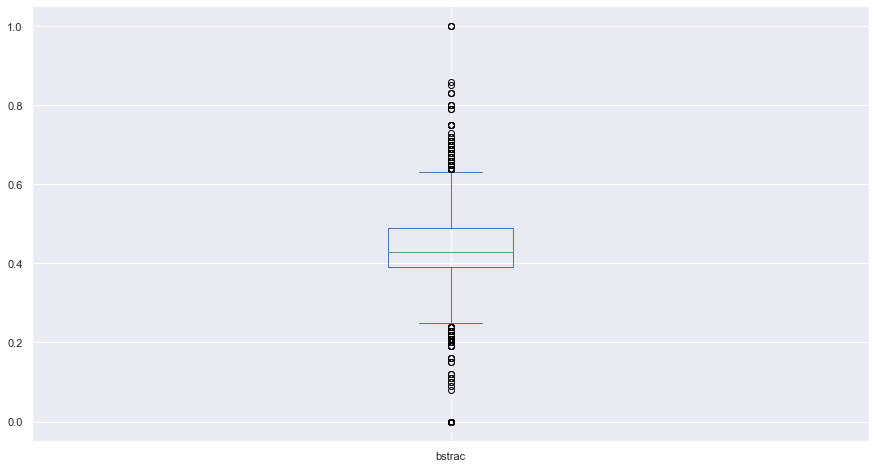

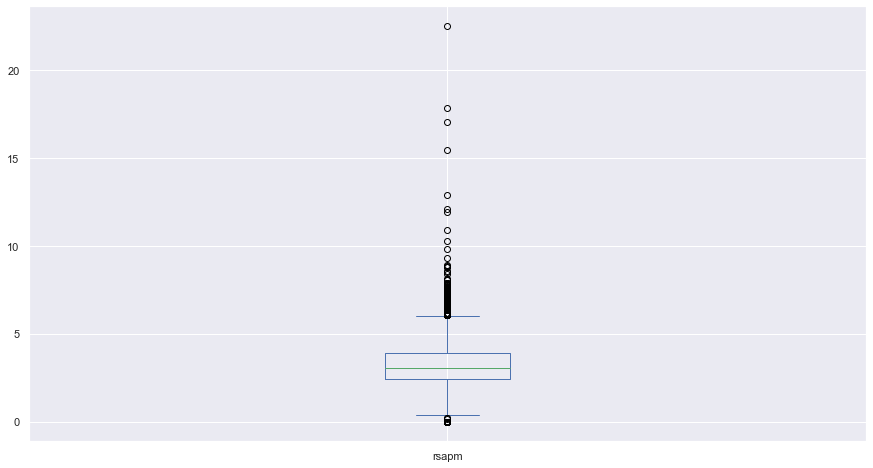

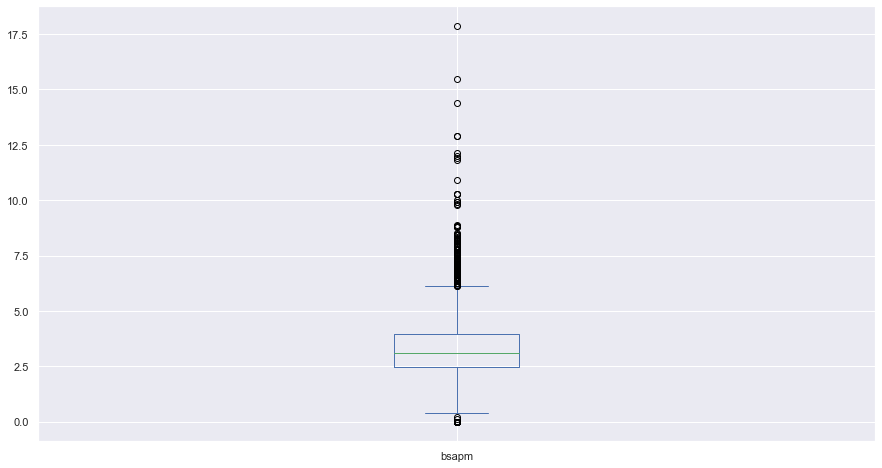

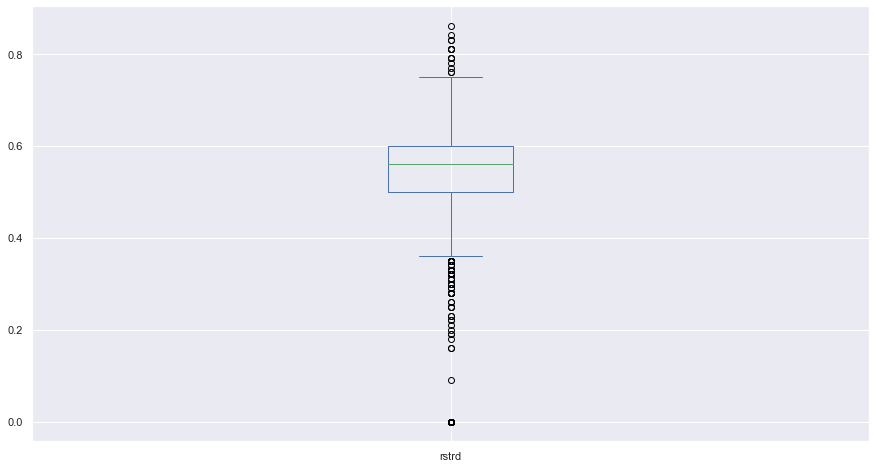

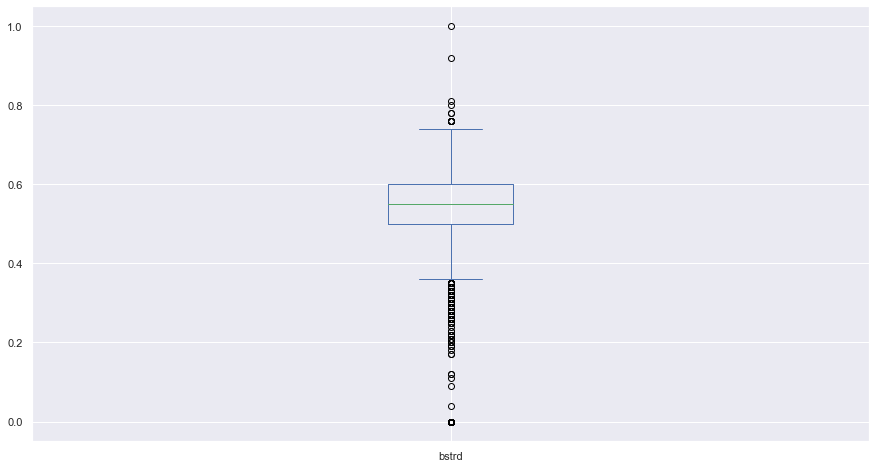

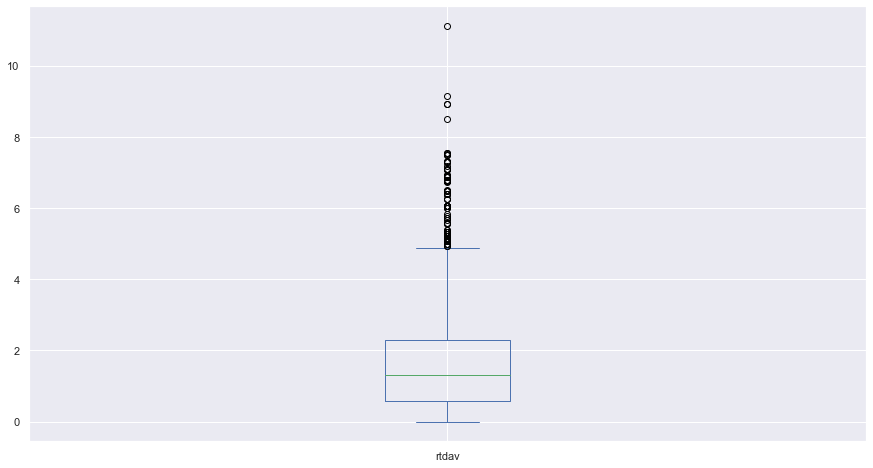

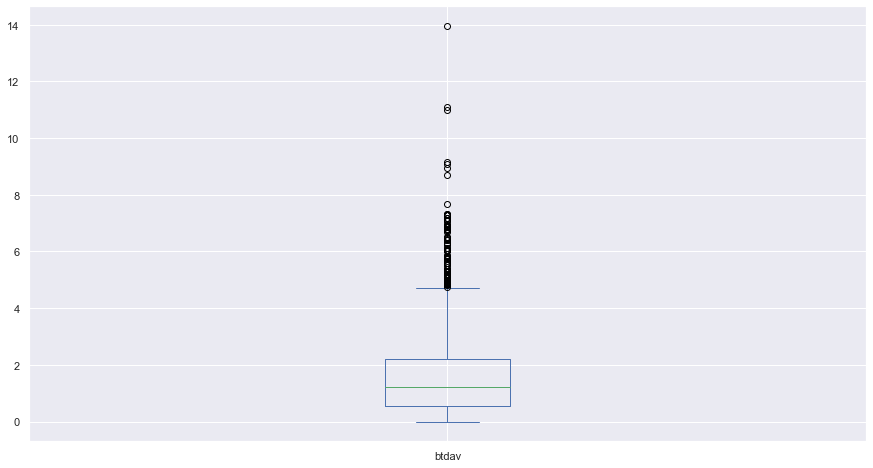

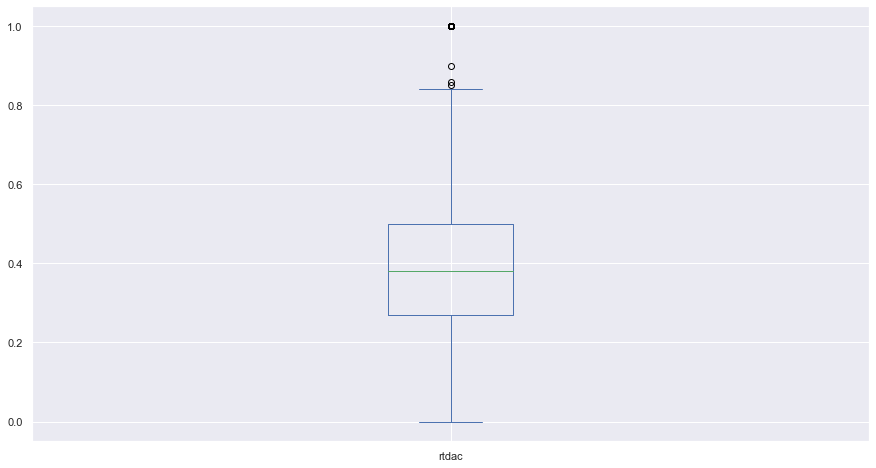

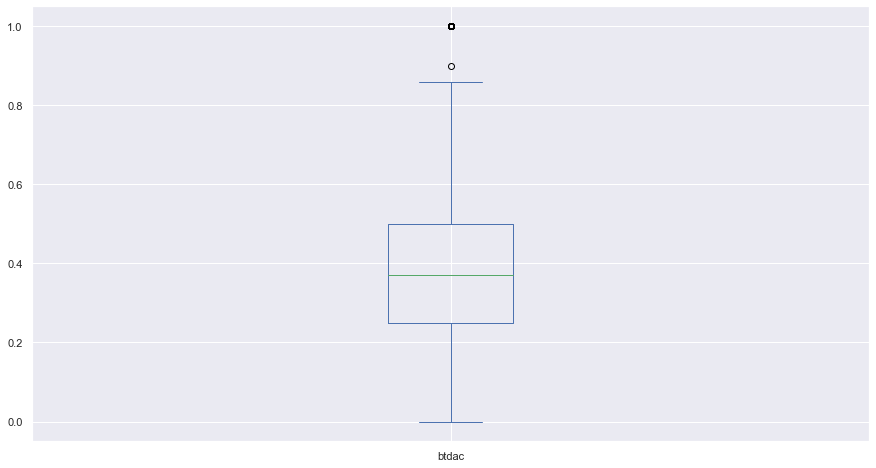

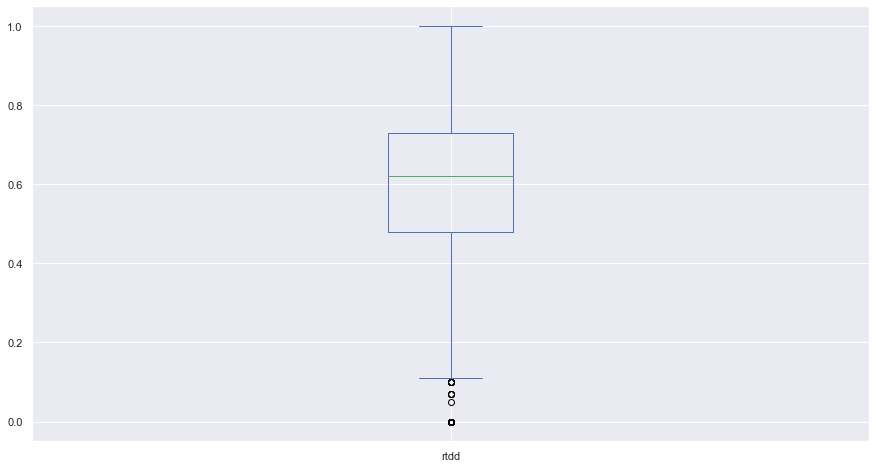

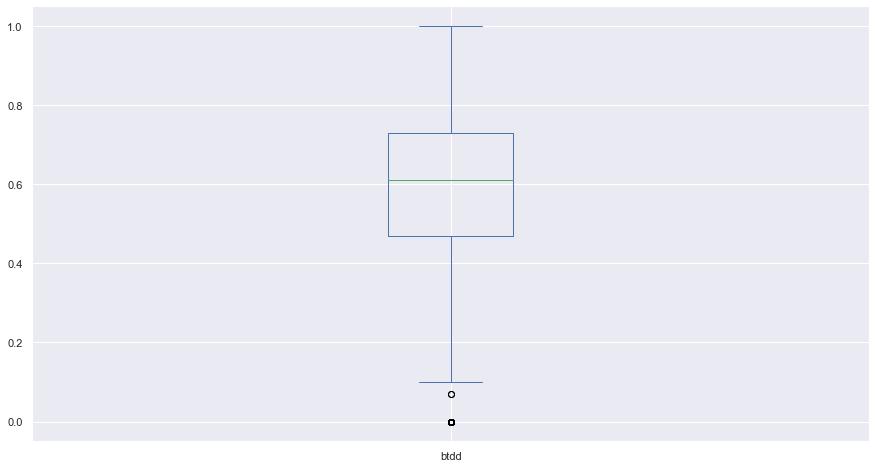

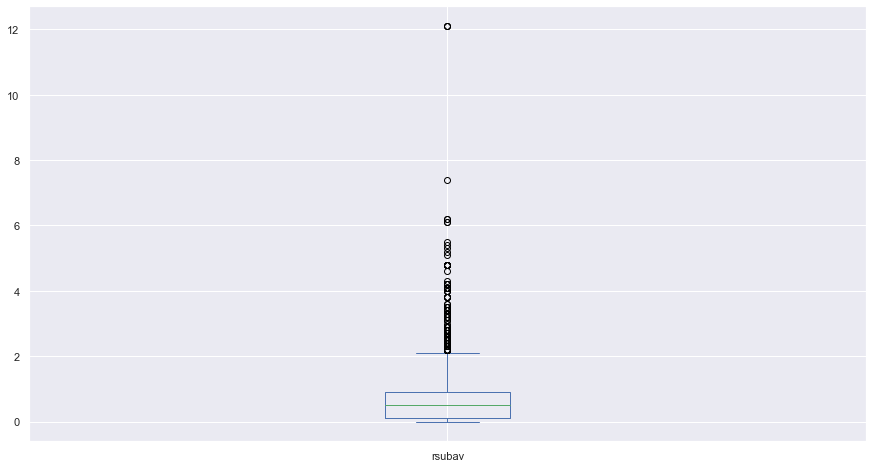

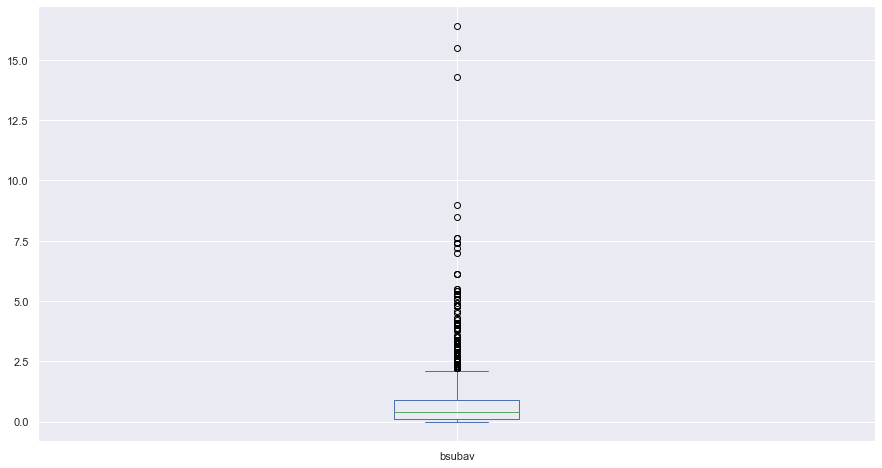

In [66]:
for index in x_labels[3:]:
    #should title and stuff
    randX[index].astype(float).plot.box()
    plt.show()

In [42]:
randX.loc[:,"rwins":].astype(float).describe()

,rwins,bwins,rloses,bloses,rslpm,bslpm,rstrac,bstrac,rsapm,bsapm,rstrd,bstrd,rtdav,btdav,rtdac,btdac,rtdd,btdd,rsubav,bsubav
count,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000,6456.000000
mean,18.657218,17.625620,7.783457,7.340304,3.235829,3.200081,0.430991,0.426758,3.212577,3.284528,0.541019,0.530057,1.570339,1.497260,0.382382,0.368505,0.586332,0.570493,0.656056,0.636509
std,9.740398,9.617278,4.579943,4.567072,1.335091,1.404710,0.100582,0.110217,1.269846,1.436596,0.108605,0.118619,1.276359,1.314826,0.201319,0.213627,0.218876,0.239926,0.764937,0.829535
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,12.000000,4.750000,4.000000,2.387500,2.340000,0.390000,0.390000,2.440000,2.480000,0.510000,0.500000,0.570000,0.520000,0.280000,0.250000,0.480000,0.470000,0.100000,0.000000
50%,17.000000,16.000000,7.000000,6.000000,3.170000,3.170000,0.440000,0.440000,3.060000,3.090000,0.560000,0.550000,1.320000,1.200000,0.390000,0.370000,0.610000,0.610000,0.500000,0.400000
75%,23.000000,22.000000,10.000000,10.000000,3.960000,4.010000,0.490000,0.490000,3.880000,3.940000,0.600000,0.600000,2.320000,2.130000,0.500000,0.500000,0.730000,0.730000,0.900000,0.900000
max,253.000000,253.000000,53.000000,53.000000,10.530000,12.070000,0.850000,1.000000,22.500000,17.860000,0.840000,1.000000,10.980000,13.950000,1.000000,1.000000,1.000000,1.000000,16.400000,15.500000


array([<AxesSubplot:title={'center':'rwins'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'bwins'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'rloses'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'bloses'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'rslpm'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'bslpm'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'rstrac'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'bstrac'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'rsapm'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'bsapm'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'rstrd'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'bstrd'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'rtdav'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'btdav'}, xlabel='winner'>,
       <AxesSubplot:title={'center':'rtdac'}, xlabel='winner'>,
       <AxesSubplot:title={'center':

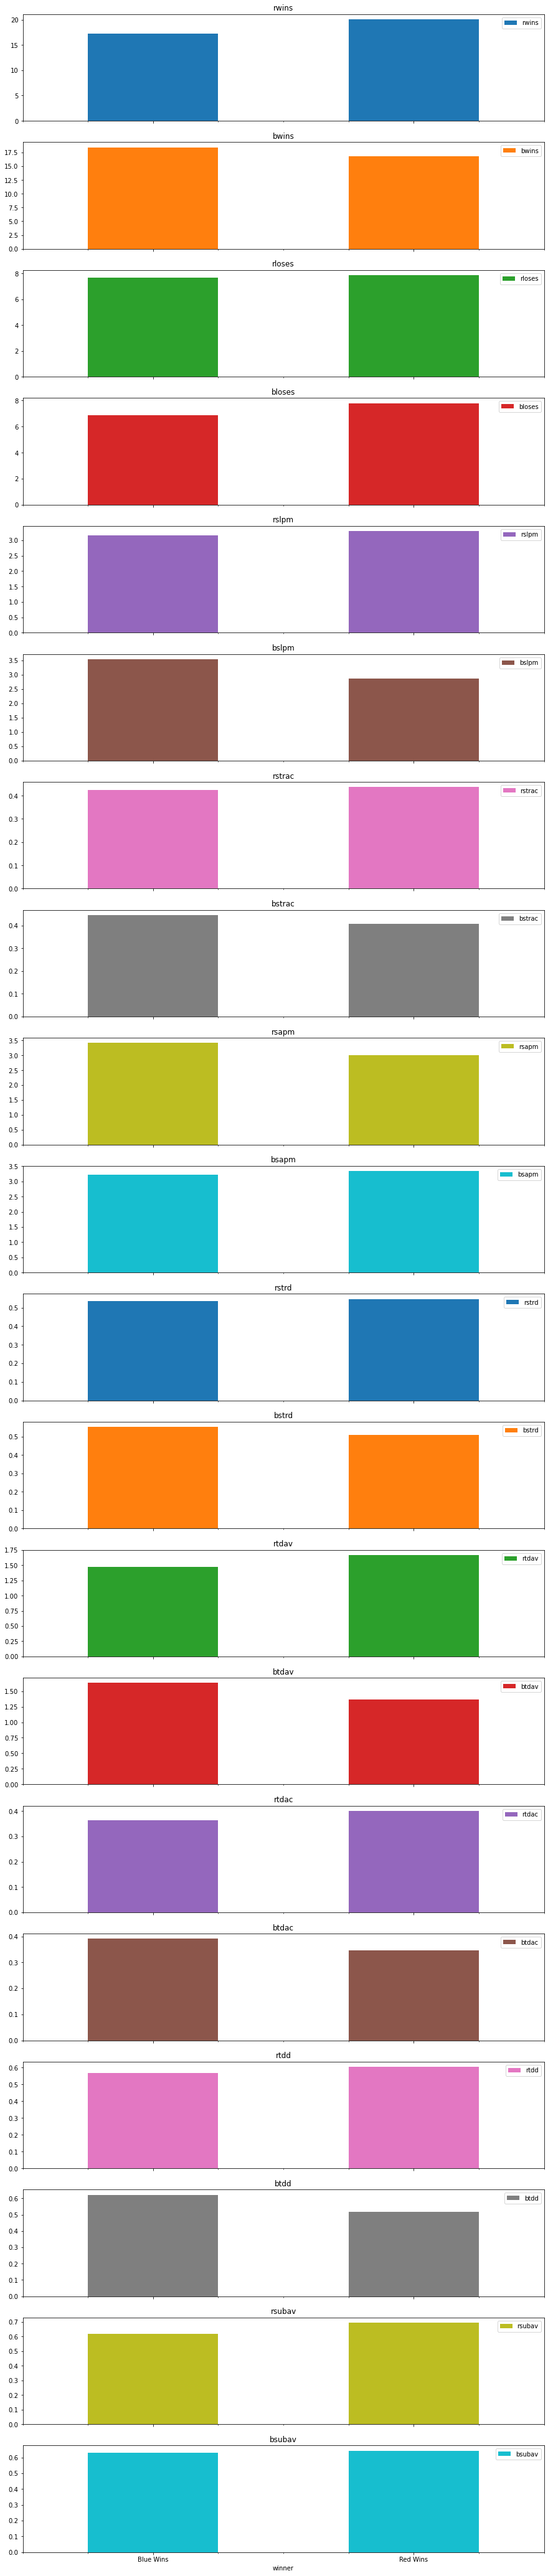

In [43]:
randX.loc[:,"winner":].astype(float).groupby('winner').mean().rename({0:"Blue Wins",1:"Red Wins"}).plot(kind='bar', subplots=True,figsize=(15,75),rot=0)

In [45]:
randX.loc[:,"winner":].astype(float).groupby('winner').describe(include="all")

rwins                                                       bwins  \
         count       mean        std  min   25%   50%   75%    max   count   
winner                                                                       
0.0     3213.0  17.213508   8.580647  0.0  11.0  16.0  22.0   91.0  3213.0   
1.0     3243.0  20.087573  10.575616  1.0  14.0  18.0  25.0  253.0  3243.0   

                                                            rloses            \
             mean        std  min   25%   50%   75%    max   count      mean   
winner                                                                         
0.0     18.453159   8.210497  1.0  13.0  17.0  23.0  101.0  3213.0  7.693122   
1.0     16.805735  10.771126  0.0  10.0  15.0  21.0  253.0  3243.0  7.872957   

                                             bloses                           \
             std  min  25%  50%   75%   max   count      mean       std  min   
winner                                                                         
0.0     4.300562  0.0  5.0  7.0  10.0  29.0  3213.0  6.876751  4.292003  0.0   
1.0     4.839868  0.0  4.0  7.0  11.0  53.0  3243.0  7.799568  4.780684  0.0   

                               rslpm                                        \
        25%  50%   75%   max   count      mean       std  min    25%   50%   
winner                                                                       
0.0     4.0  6.0   9.0  31.0  3213.0  3.171805  1.294511  0.0  2.330  3.12   
1.0     4.0  7.0  10.0  53.0  3243.0  3.299260  1.371369  0.0  2.425  3.21   

                       bslpm                                             \
          75%    max   count      mean       std  min   25%   50%   75%   
winner                                                                    
0.0     3.900  10.53  3213.0  3.541849  1.313754  0.0  2.71  3.44  4.26   
1.0     4.095  10.53  3243.0  2.861474  1.410085  0.0  1.98  2.85  3.72   

               rstrac                                                   \
          max   count      mean       std  min   25%   50%   75%   max   
winner                                                                   
0.0     12.07  3213.0  0.424883  0.099479  0.0  0.38  0.43  0.48  0.85   
1.0      8.76  3243.0  0.437043  0.101316  0.0  0.40  0.44  0.49  0.83   

        bstrac                                                    rsapm  \
         count      mean       std  min   25%   50%   75%   max   count   
winner                                                                    
0.0     3213.0  0.445462  0.086056  0.0  0.40  0.45  0.50  0.79  3213.0   
1.0     3243.0  0.408227  0.127120  0.0  0.36  0.42  0.48  1.00  3243.0   

                                                           bsapm            \
            mean       std  min   25%   50%   75%    max   count      mean   
winner                                                                       
0.0     3.413175  1.334647  0.0  2.60  3.24  4.07  22.50  3213.0  3.224625   
1.0     3.013836  1.168933  0.0  2.31  2.94  3.73  10.27  3243.0  3.343876   

                                                  rstrd                      \
             std  min    25%   50%   75%    max   count      mean       std   
winner                                                                        
0.0     1.173242  0.0  2.500  3.08  3.87   9.84  3213.0  0.534833  0.103469   
1.0     1.654785  0.0  2.465  3.12  4.06  17.86  3243.0  0.547148  0.113147   

                                      bstrd                                 \
        min   25%   50%   75%   max   count      mean       std  min   25%   
winner                                                                       
0.0     0.0  0.50  0.55  0.59  0.81  3213.0  0.552437  0.088893  0.0  0.52   
1.0     0.0  0.52  0.57  0.61  0.84  3243.0  0.507885  0.138557  0.0  0.47   

                           rtdav                                             \
         50%   75%   max   count      mean   

<AxesSubplot:>

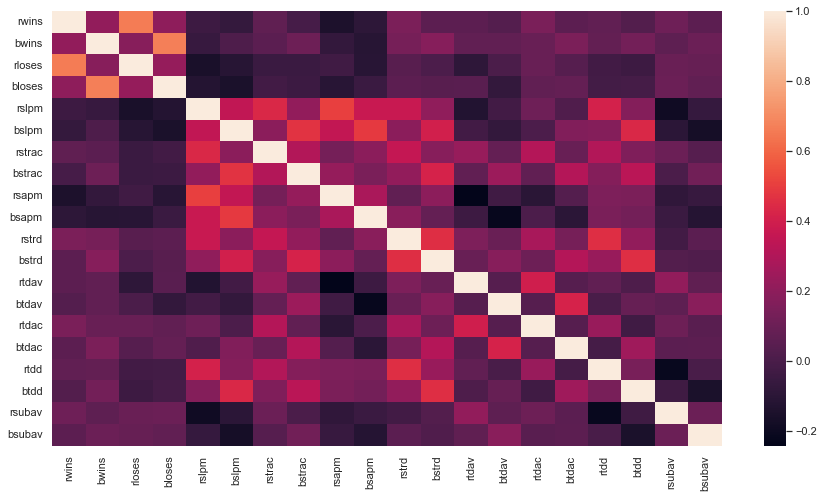

In [46]:
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(randX.loc[:,"rwins":].astype(float).corr(method='pearson'))

In [47]:
randX.loc[:,"winner":].astype(float).corr()

,winner,rwins,bwins,rloses,bloses,rslpm,bslpm,rstrac,bstrac,rsapm,bsapm,rstrd,bstrd,rtdav,btdav,rtdac,btdac,rtdd,btdd,rsubav,bsubav
winner,1.000000,0.147543,-0.085655,0.019634,0.101036,0.047736,-0.242192,0.060450,-0.168929,-0.157250,0.041508,0.056697,-0.187809,0.079394,-0.102624,0.094944,-0.104466,0.082190,-0.215244,0.050064,0.007695
rwins,0.147543,1.000000,0.211657,0.656673,0.204164,-0.039827,-0.067553,0.065046,-0.009489,-0.146915,-0.091741,0.148070,0.055879,0.056310,0.030346,0.145957,0.055577,0.072569,0.025911,0.111252,0.054933
bwins,-0.085655,0.211657,1.000000,0.180168,0.665873,-0.060410,0.010302,0.052004,0.104961,-0.073749,-0.113089,0.133119,0.176555,0.072986,0.071029,0.092616,0.150796,0.074279,0.123139,0.062002,0.099830
rloses,0.019634,0.656673,0.180168,1.000000,0.223463,-0.156655,-0.112504,-0.050685,-0.051495,-0.029773,-0.110861,0.042833,0.009228,-0.091127,0.005402,0.090966,0.037287,-0.027864,-0.040072,0.093988,0.083773
bloses,0.101036,0.204164,0.665873,0.223463,1.000000,-0.125407,-0.153843,-0.027073,-0.045933,-0.108848,-0.051557,0.057216,0.040874,0.047585,-0.075650,0.072337,0.078291,-0.020406,-0.018238,0.099507,0.071719
rslpm,0.047736,-0.039827,-0.060410,-0.156655,-0.125407,1.000000,0.349117,0.433039,0.209619,0.504519,0.370131,0.371613,0.207142,-0.127711,-0.025674,0.111316,0.019892,0.409167,0.170901,-0.191534,-0.063904
bslpm,-0.242192,-0.067553,0.010302,-0.112504,-0.153843,0.349117,1.000000,0.190347,0.466619,0.353128,0.486345,0.190301,0.401189,-0.023788,-0.074583,0.006683,0.163379,0.170974,0.432597,-0.098725,-0.171142
rstrac,0.060450,0.065046,0.052004,-0.050685,-0.027073,0.433039,0.190347,1.000000,0.302083,0.126832,0.192747,0.359129,0.181002,0.227006,0.079774,0.306952,0.088959,0.305459,0.159721,0.098150,0.037341
bstrac,-0.168929,-0.009489,0.104961,-0.051495,-0.045933,0.209619,0.466619,0.302083,1.000000,0.220170,0.143870,0.211236,0.413934,0.072932,0.241476,0.071303,0.308874,0.170984,0.326328,0.002022,0.117472
rsapm,-0.157250,-0.146915,-0.073749,-0.029773,-0.108848,0.504519,0.353128,0.126832,0.220170,1.000000,0.280907,0.071101,0.198022,-0.241994,-0.030548,-0.102803,0.031489,0.152958,0.146745,-0.084315,-0.059212


If the results are bad, we should do oversampling - https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/#:~:text=The%20two%20main%20approaches%20to,the%20minority%20class%2C%20called%20oversampling.